In [1]:
import tensorflow as tf

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib

path='/content/drive/MyDrive/traffic_Data/DATA/'
data_dir = pathlib.Path(path)

In [4]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

4170


In [54]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print((output_classes))

['56', '8', '57', '53', '55', '6', '9', '52', '54', '7', '50', '43', '5', '46', '51', '44', '49', '48', '47', '45', '36', '34', '37', '39', '4', '41', '40', '35', '38', '42', '26', '33', '3', '25', '28', '32', '31', '29', '30', '27', '23', '16', '19', '18', '2', '24', '21', '20', '22', '17', '1', '15', '11', '0', '10', '13', '12', '14']


In [6]:
# Check if all the images have same shape, else you need to resize them to some common size
# I have created a list which stores the sizes of all the images. 
# In order to check for different shapes, we will count the unique shapes present in the list
import cv2
from google.colab.patches import cv2_imshow
combined_images_shape = []
dict 
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count = os.listdir(dir)

  for i in im_count:
    img_show = this_path + '/' + i
    img = cv2.imread(img_show)
    combined_images_shape.append(img.shape)  

print(combined_images_shape)
print(len(combined_images_shape))

[(208, 242, 3), (98, 109, 3), (112, 126, 3), (132, 137, 3), (172, 202, 3), (89, 125, 3), (217, 248, 3), (216, 250, 3), (204, 239, 3), (100, 104, 3), (216, 250, 3), (212, 255, 3), (140, 168, 3), (138, 154, 3), (217, 248, 3), (132, 137, 3), (198, 212, 3), (86, 100, 3), (270, 329, 3), (257, 287, 3), (177, 202, 3), (204, 239, 3), (156, 194, 3), (198, 212, 3), (248, 281, 3), (208, 242, 3), (138, 154, 3), (121, 142, 3), (174, 218, 3), (140, 168, 3), (207, 204, 3), (191, 218, 3), (264, 304, 3), (192, 193, 3), (200, 210, 3), (98, 109, 3), (179, 198, 3), (175, 178, 3), (86, 86, 3), (110, 119, 3), (81, 95, 3), (168, 188, 3), (175, 178, 3), (193, 239, 3), (103, 120, 3), (173, 185, 3), (182, 218, 3), (179, 213, 3), (230, 231, 3), (86, 100, 3), (311, 342, 3), (133, 148, 3), (191, 218, 3), (125, 141, 3), (214, 250, 3), (270, 329, 3), (160, 196, 3), (207, 204, 3), (248, 281, 3), (176, 193, 3), (107, 106, 3), (168, 188, 3), (147, 148, 3), (192, 193, 3), (158, 178, 3), (101, 100, 3), (158, 178, 3), (16

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
INPUT_SIZE = [50,50]
BATCH = 32

image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=path,
                                          
                                                 target_size=INPUT_SIZE, 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=path,
                                                 target_size= INPUT_SIZE, 
                                                 subset="validation",
                                                 class_mode='categorical')




Found 3359 images belonging to 58 classes.
Found 811 images belonging to 58 classes.


In [47]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential

model =Sequential() 
model.add(Flatten(input_shape=[50,50,3]))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(58, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 7500)              0         
                                                                 
 dense_15 (Dense)            (None, 300)               2250300   
                                                                 
 dense_16 (Dense)            (None, 100)               30100     
                                                                 
 dense_17 (Dense)            (None, 58)                5858      
                                                                 
Total params: 2,286,258
Trainable params: 2,286,258
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = "accuracy")

In [49]:
r = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=20,
  steps_per_epoch=len(train_dataset),
  validation_steps=len(validation_dataset)
)

Epoch 1/20
105/105 [==============================] - 11s 99ms/step - loss: 2.8058 - accuracy: 0.3391 - val_loss: 2.0879 - val_accuracy: 0.4735
Epoch 2/20
105/105 [==============================] - 10s 97ms/step - loss: 1.6207 - accuracy: 0.6115 - val_loss: 1.3431 - val_accuracy: 0.6350
Epoch 3/20
105/105 [==============================] - 10s 98ms/step - loss: 1.1100 - accuracy: 0.7065 - val_loss: 1.1577 - val_accuracy: 0.6671
Epoch 4/20
105/105 [==============================] - 10s 97ms/step - loss: 0.7811 - accuracy: 0.7928 - val_loss: 0.7369 - val_accuracy: 0.8052
Epoch 5/20
105/105 [==============================] - 10s 98ms/step - loss: 0.6320 - accuracy: 0.8258 - val_loss: 0.6564 - val_accuracy: 0.8360
Epoch 6/20
105/105 [==============================] - 10s 98ms/step - loss: 0.4727 - accuracy: 0.8708 - val_loss: 0.6248 - val_accuracy: 0.8101
Epoch 7/20
105/105 [==============================] - 11s 102ms/step - loss: 0.4137 - accuracy: 0.8830 - val_loss: 0.5965 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


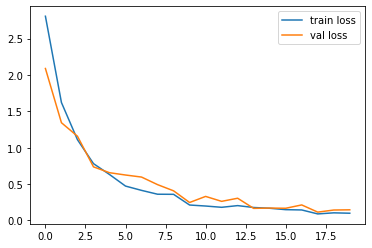

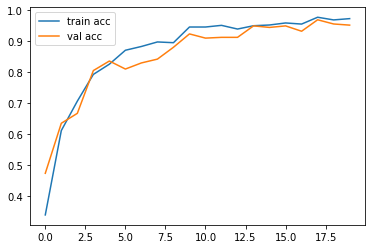

In [50]:
# Plot training & validation loss/accuracy values
print(r.history.keys())
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


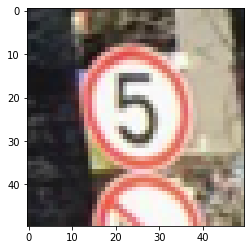

In [67]:
# label_set = pd.read_csv('/content/drive/MyDrive/traffic signs/labels.csv')
import numpy as np
from PIL import Image
image = Image.open('/content/drive/MyDrive/traffic_Data/TEST/000_0002_j.png')
image = image.resize((50,50))
image = np.array(image)
imgarray = []
imgarray.append(image)
# print(imgarray)
imgarray = np.array(imgarray)
plt.imshow(image)

In [68]:
import pandas as pd
df = pd.read_csv('labels.csv')
lists_of_name= df['Name'].tolist()
lists_of_name
df

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


No entry


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Model Predicted one hot encoded form: 
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Model predicted label index: 0

Model predicted traffic signal sign board as : Speed limit (5km/h)



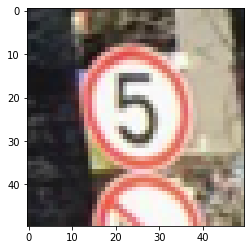

In [69]:
import numpy as np
predictions = model.predict(imgarray)
print(predictions)
plt.imshow(image)
# plt.figure(figsize=(15,4.5))
# predictions = model.predict(y_test)
for i in range(1):  
    print('Model Predicted one hot encoded form: \n{label}\n'.format(label=(predictions[i])))
    # print('Model rounded prediction: {label}\n'.format(label=np.round(predictions[i])))
    print('Model predicted label index: {label}\n'.format(label = np.argmax(predictions[i])))
    print('Model predicted traffic signal sign board as : {label}\n'.format(label = lists_of_name[np.argmax(predictions[i])]))



In [63]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

import itertools
import numpy as np


validation_classes = []
validation_images = []
for i in range( -(-validation_dataset.samples // validation_dataset.batch_size)):
   batch = validation_dataset.next()
   expected = np.argmax(batch[1], axis=1) 
   validation_classes.extend(expected)
   validation_images.extend(batch[0])
validation_classes = np.array(validation_classes)
validation_images = np.array(validation_images)
Y_pred = model.predict(validation_images)
y_pred = np.argmax(Y_pred, axis=1)


print(classification_report(validation_classes, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         8
           2       0.93      1.00      0.97        14
           3       0.93      1.00      0.96        27
           4       1.00      0.95      0.97        19
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00         4
           8       1.00      0.82      0.90        28
           9       0.87      1.00      0.93        26
          10       1.00      1.00      1.00         1
          12       0.83      0.94      0.88        16
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00        20
          19       1.00    